In [2]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from matplotlib.pyplot import figure
from matplotlib import rc
from matplotlib import font_manager
mpl.rcParams['axes.linewidth'] = 2 #set the value globally

In [3]:
def coeff_determination(y_true, y_pred):
    SS_res =  sum((y_true-y_pred)**2)
    SS_tot = sum((y_true-sum(y_true)/len(y_true))**2)
    return ( 1 - SS_res/(SS_tot) )

In [4]:
RMSE_CE_Rg_shuffle_train_list = np.load('RMSE_CE_Rg_shuffle_train_list.npy',allow_pickle=True)
RMSE_CE_Rg_shuffle_test_list = np.load('RMSE_CE_Rg_shuffle_test_list.npy',allow_pickle=True)
Score_CE_Rg_shuffle_train_list = np.load('Score_CE_Rg_shuffle_train_list.npy',allow_pickle=True)
Score_CE_Rg_shuffle_test_list = np.load('Score_CE_Rg_shuffle_test_list.npy',allow_pickle=True)

Y_shuffle_train_list = np.load('Y_shuffle_train_list.npy',allow_pickle=True)
score_list_shuffle = np.load('score_list_shuffle.npy',allow_pickle=True)
score_train_list_shuffle = np.load('score_train_list_shuffle.npy',allow_pickle=True)
RMSE_list_shuffle = np.load('RMSE_list_shuffle.npy',allow_pickle=True)
RMSE_train_list_shuffle = np.load('RMSE_train_list_shuffle.npy',allow_pickle=True)

score_list_old_shuffle = np.load('score_list_old_shuffle.npy',allow_pickle=True)
score_train_list_old_shuffle = np.load('score_train_list_old_shuffle.npy',allow_pickle=True)
RMSE_list_old_shuffle = np.load('RMSE_list_old_shuffle.npy',allow_pickle=True)
RMSE_train_list_old_shuffle = np.load('RMSE_train_list_old_shuffle.npy',allow_pickle=True)

In [5]:
score_list_shuffle

array([[ 0.9154764 ,  0.91430332,  0.91304908,  0.91205309,  0.91197264,
         0.91273342,  0.91400115,  0.91478026,  0.91481493,  0.91473039,
         0.91442525,  0.9139468 ,  0.91333746,  0.91272341,  0.91233408,
         0.91197975,  0.9115497 ,  0.91112443,  0.91078412,  0.91040835,
         0.90995775,  0.90943781,  0.90886063,  0.90821229,  0.907549  ,
         0.90686993,  0.90617051,  0.90547015,  0.90476823,  0.904062  ,
         0.90337222,  0.9027086 ,  0.90205829,  0.90141947,  0.90080342,
         0.90021961,  0.89965521,  0.89911581,  0.89859549,  0.89809173,
         0.89760665],
       [ 0.87620675,  0.87688102,  0.87678158,  0.87664684,  0.87665309,
         0.87657699,  0.87652798,  0.87559046,  0.87385709,  0.87181444,
         0.86889872,  0.86546704,  0.86172646,  0.85795551,  0.85463901,
         0.85181486,  0.84939793,  0.84761644,  0.8462184 ,  0.84487491,
         0.84368741,  0.84259625,  0.84160078,  0.84061361,  0.83970335,
         0.83881937,  0.83791

In [6]:
beta_list = [-x/10 for x in range(41)]

In [7]:
font_dirs = ['/scratch/user/peterchao1/font/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

In [8]:
mpl.rcParams["font.family"] = "Calibri"

In [9]:
shuffle_ratio = [0.0, 0.2,0.4,0.6,0.8,1.0]

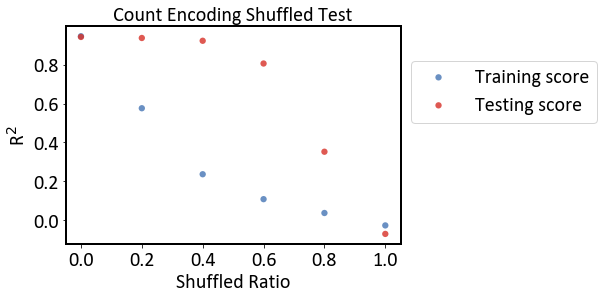

In [9]:
fig, ax = plt.subplots()

ax.scatter(shuffle_ratio,Score_CE_Rg_shuffle_train_list,s=40,color='#4575b4',alpha=0.8,edgecolors='none',label = 'Training score')
ax.scatter(shuffle_ratio,Score_CE_Rg_shuffle_test_list,s=40,color='#d73027',alpha=0.8,edgecolors='none',label = 'Testing score')
plt.xticks(fontsize=20)
plt.xlabel('Shuffled Ratio',fontsize=20)
plt.ylabel('R$^2$',fontsize=20)
plt.title('Count Encoding Shuffled Test',fontsize=20)
plt.yticks(fontsize=20)
plt.legend(bbox_to_anchor=(1.0,0.7),loc="center left",fontsize=20)
plt.savefig('./CE_shuffled_test.png',dpi=400,bbox_inches='tight')

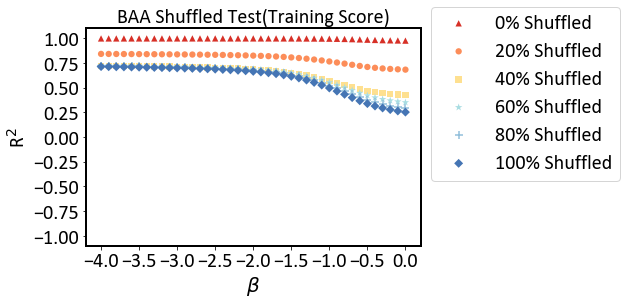

In [28]:
fig, ax = plt.subplots()

ax.scatter(beta_list,score_train_list_old_shuffle,s=40,color='#d73027',alpha=1,edgecolors='none',label = '0% Shuffled',marker="^")
ax.scatter(beta_list,score_train_list_shuffle[0],s=40,color='#fc8d59',alpha=1,edgecolors='none',label = '20% Shuffled',marker="o")
ax.scatter(beta_list,score_train_list_shuffle[1],s=40,color='#fee090',alpha=1,edgecolors='none',label = '40% Shuffled',marker="s")
ax.scatter(beta_list,score_train_list_shuffle[2],s=60,color='#a8dde2',alpha=1,edgecolors='none',label = '60% Shuffled',marker="*")
ax.scatter(beta_list,score_train_list_shuffle[3],s=60,color='#91bfdb',alpha=1,edgecolors='none',label = '80% Shuffled',marker="+")
ax.scatter(beta_list,score_train_list_shuffle[4],s=40,color='#4575b4',alpha=1,edgecolors='none',label = '100% Shuffled',marker="D")

plt.xticks(fontsize=20)
plt.xlabel(r'$\beta$',fontsize=20)
plt.ylabel('R$^2$',fontsize=20)
plt.title('BAA Shuffled Test(Training Score)',fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(-1.1,1.1)
plt.legend(bbox_to_anchor=(1.0,0.7),loc="center left",fontsize=20)
plt.savefig('./BAA_shuffled_train.png',dpi=400,bbox_inches='tight')

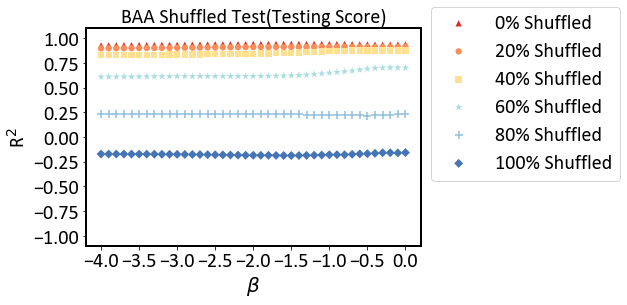

In [29]:
fig, ax = plt.subplots()

ax.scatter(beta_list,score_list_old_shuffle,s=40,color='#d73027',alpha=1,edgecolors='none',label = '0% Shuffled',marker="^")
ax.scatter(beta_list,score_list_shuffle[0],s=40,color='#fc8d59',alpha=1,edgecolors='none',label = '20% Shuffled',marker="o")
ax.scatter(beta_list,score_list_shuffle[1],s=40,color='#fee090',alpha=1,edgecolors='none',label = '40% Shuffled',marker="s")
ax.scatter(beta_list,score_list_shuffle[2],s=60,color='#a8dde2',alpha=1,edgecolors='none',label = '60% Shuffled',marker='*')
ax.scatter(beta_list,score_list_shuffle[3],s=60,color='#91bfdb',alpha=1,edgecolors='none',label = '80% Shuffled',marker="+")
ax.scatter(beta_list,score_list_shuffle[4],s=40,color='#4575b4',alpha=1,edgecolors='none',label = '100% Shuffled',marker="D")

plt.xticks(fontsize=20)
plt.xlabel(r'$\beta$',fontsize=20)
plt.ylabel('R$^2$',fontsize=20)
plt.title('BAA Shuffled Test(Testing Score)',fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(-1.1,1.1)
plt.legend(bbox_to_anchor=(1.0,0.7),loc="center left",fontsize=20)
plt.savefig('./BAA_shuffled_test.png',dpi=400,bbox_inches='tight')

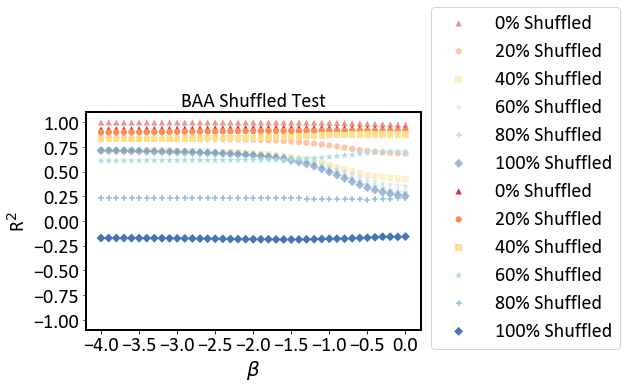

In [19]:
fig, ax = plt.subplots()

ax.scatter(beta_list,score_train_list_old_shuffle,s=40,color='#d73027',alpha=0.5,edgecolors='none',label = '0% Shuffled',marker="^")
ax.scatter(beta_list,score_train_list_shuffle[0],s=40,color='#fc8d59',alpha=0.5,edgecolors='none',label = '20% Shuffled',marker="o")
ax.scatter(beta_list,score_train_list_shuffle[1],s=40,color='#fee090',alpha=0.5,edgecolors='none',label = '40% Shuffled',marker="s")
ax.scatter(beta_list,score_train_list_shuffle[2],s=60,color='#a8dde2',alpha=0.5,edgecolors='none',label = '60% Shuffled',marker="*")
ax.scatter(beta_list,score_train_list_shuffle[3],s=40,color='#91bfdb',alpha=0.5,edgecolors='none',label = '80% Shuffled',marker="+")
ax.scatter(beta_list,score_train_list_shuffle[4],s=40,color='#4575b4',alpha=0.5,edgecolors='none',label = '100% Shuffled',marker="D")

ax.scatter(beta_list,score_list_old_shuffle,s=40,color='#d73027',alpha=1,edgecolors='none',label = '0% Shuffled',marker="^")
ax.scatter(beta_list,score_list_shuffle[0],s=40,color='#fc8d59',alpha=1,edgecolors='none',label = '20% Shuffled',marker="o")
ax.scatter(beta_list,score_list_shuffle[1],s=40,color='#fee090',alpha=1,edgecolors='none',label = '40% Shuffled',marker="s")
ax.scatter(beta_list,score_list_shuffle[2],s=60,color='#a8dde2',alpha=1,edgecolors='none',label = '60% Shuffled',marker='*')
ax.scatter(beta_list,score_list_shuffle[3],s=40,color='#91bfdb',alpha=1,edgecolors='none',label = '80% Shuffled',marker="+")
ax.scatter(beta_list,score_list_shuffle[4],s=40,color='#4575b4',alpha=1,edgecolors='none',label = '100% Shuffled',marker="D")
#fee090
plt.xticks(fontsize=20)
plt.xlabel(r'$\beta$',fontsize=20)
plt.ylabel('R$^2$',fontsize=20)
plt.title('BAA Shuffled Test',fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(-1.1,1.1)
plt.legend(bbox_to_anchor=(1.0,0.7),loc="center left",fontsize=20)
plt.savefig('./BAA_shuffled_test_combined.png',dpi=400,bbox_inches='tight')

In [59]:
print(coeff_determination(Y_shuffle_train_list[0],Y_shuffle_train_list[1]))
print(coeff_determination(Y_shuffle_train_list[0],Y_shuffle_train_list[2]))
print(coeff_determination(Y_shuffle_train_list[0],Y_shuffle_train_list[3]))
print(coeff_determination(Y_shuffle_train_list[0],Y_shuffle_train_list[4]))
print(coeff_determination(Y_shuffle_train_list[0],Y_shuffle_train_list[5]))

0.5827650370218325
0.16117316670014536
-0.19261087832270474
-0.5546084354673502
-0.9837055411088786


In [10]:
Y_shuffle_train_coeff = []
for i in range(0,6,1):
    Y_shuffle_train_coeff.append(coeff_determination(Y_shuffle_train_list[0],Y_shuffle_train_list[i]))

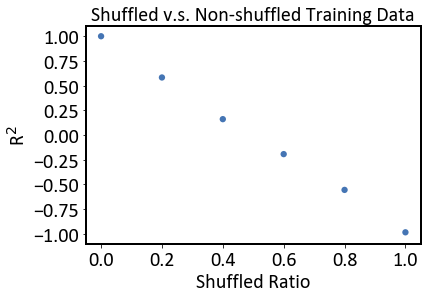

In [31]:
fig, ax = plt.subplots()

ax.scatter(shuffle_ratio,Y_shuffle_train_coeff,s=40,color='#4575b4',alpha=1,edgecolors='none')

plt.xticks(fontsize=20)
plt.xlabel('Shuffled Ratio',fontsize=20)
plt.ylabel('R$^2$',fontsize=20)
plt.title('Shuffled v.s. Non-shuffled Training Data',fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(-1.1,1.1)
plt.savefig('./Shuffled_train_correlation.png',dpi=400,bbox_inches='tight')

In [13]:
R_beta = np.load('R_beta.npy',allow_pickle=True)
R_beta_beta_list = np.load('R_beta_beta_list.npy',allow_pickle=True)

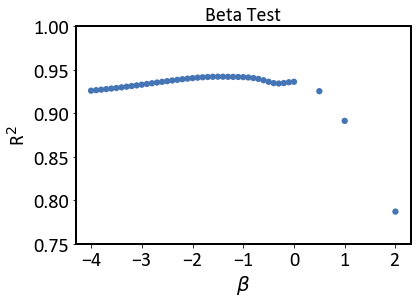

In [90]:
fig, ax = plt.subplots()

ax.scatter(R_beta_beta_list,R_beta,s=40,color='#4575b4',alpha=1,edgecolors='none')

plt.xticks(fontsize=20)
plt.xlabel(r'$\beta$',fontsize=20)
plt.ylabel('R$^2$',fontsize=20)
plt.title('Beta Test',fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(0.75,1.0)
plt.savefig('./Beta_performance.png',dpi=400,bbox_inches='tight')

In [14]:
All_rmse = np.sum(np.load('All_rmse.npy'),axis=1)
All_rmse_21_41 = np.sum(np.load('All_rmse_21_41.npy'),axis=1)
All = np.hstack((All_rmse,All_rmse_21_41))

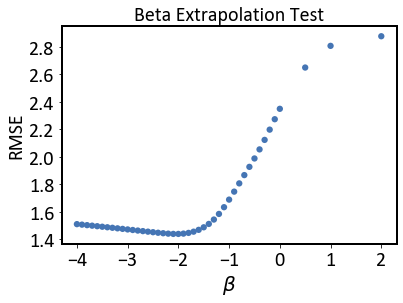

In [99]:
fig, ax = plt.subplots()

ax.scatter(R_beta_beta_list,np.array(All)/10,s=40,color='#4575b4',alpha=1,edgecolors='none')

plt.xticks(fontsize=20)
plt.xlabel(r'$\beta$',fontsize=20)
plt.ylabel('RMSE',fontsize=20)
plt.title('Beta Extrapolation Test',fontsize=20)
plt.yticks(fontsize=20)
plt.savefig('./Beta_extrapolation.png',dpi=400,bbox_inches='tight')

In [12]:
score_test_rev_list = np.load('score_test_rev_list.npy',allow_pickle=True)
score_train_rev_list = np.load('score_train_rev_list.npy',allow_pickle=True)

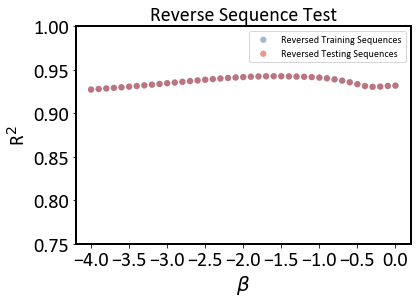

In [17]:
fig, ax = plt.subplots()

ax.scatter(R_beta_beta_list[3:],score_test_rev_list,s=40,color='#4575b4',alpha=0.5,edgecolors='none',label = 'Reversed Training Sequences')
ax.scatter(R_beta_beta_list[3:],score_train_rev_list,s=40,color='#d73027',alpha=0.5,edgecolors='none',label = 'Reversed Testing Sequences')
plt.xticks(fontsize=20)
plt.xlabel(r'$\beta$',fontsize=20)
plt.ylabel('R$^2$',fontsize=20)
plt.title('Reverse Sequence Test',fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(0.75,1.0)
plt.legend()
plt.savefig('./Reverse_sequences.png',dpi=400,bbox_inches='tight')

In [11]:
score_non_directional_list = np.load('../score_non_directional_list.npy',allow_pickle=True)

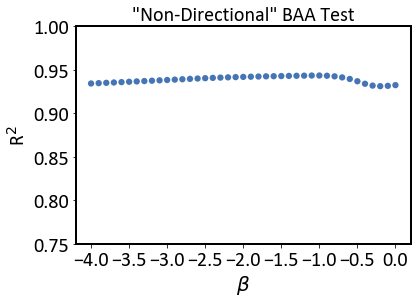

In [18]:
fig, ax = plt.subplots()

ax.scatter(R_beta_beta_list[3:],score_non_directional_list,s=40,color='#4575b4',edgecolors='none')
plt.xticks(fontsize=20)
plt.xlabel(r'$\beta$',fontsize=20)
plt.ylabel('R$^2$',fontsize=20)
plt.title('"Non-Directional" BAA Test',fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(0.75,1.0)
plt.savefig('./non_directional.png',dpi=400,bbox_inches='tight')

In [32]:
seq = np.load("../New_data_nu.npy",allow_pickle=True)
seq = seq.item()
data_seq = []
Rg = []
nu = []
for i in range(len(seq)):
    data_seq.append(seq[i][0])
    Rg.append(seq[i][1][1][1])
    nu.append(seq[i][1][1][3])

In [34]:
data_seq[5204]

'HIPLRKAGKQAGKKHHPQTALISSSYKARVDKTQPPQVLSVPAPHRYSDGHATLKPPALISPSTELLSVNVKENDSKFCQIKNARMLPPQPTKHTTVTIRRTYEPSSYTQEGEKLQ'

In [35]:
aa_to_int = {
    'A':1,
    'C':2,
    'D':3,
    'E':4,
    'F':5,
    'G':6,
    'H':7,
    'I':8,
    'K':9,
    'L':10,
    'M':11,
    'N':12,
    'P':13,
    'Q':14,
    'R':15,
    'S':16,
    'T':17,
    'V':18,
    'W':19,
    'Y':20,
    'start':21,
    'stop':22,
    '-':23}

int_to_aa = {value:key for key, value in aa_to_int.items()}

def get_aa_to_int():
    """
    Get the lookup table (for easy import)
    """
    return aa_to_int

def get_int_to_aa():
    """
    Get the lookup table (for easy import)
    """
    return int_to_aa

def aa_seq_to_int(s):
    """
    Return the int sequence as a list for a given string of amino acids
    """
    return [21] + [aa_to_int[a] for a in s] + [22]

def int_seq_to_aa(s):
    """
    Return the int sequence as a list for a given string of amino acids
    """
    return "".join([int_to_aa[i] for i in s])

In [45]:
min(nu)

0.39665773886645306

In [50]:
min_idx = np.where(nu == min(nu))
max_idx = np.where(nu == max(nu))
medium_idx = np.where(abs(np.array(nu)-0.5) == min((abs(np.array(nu)-0.5))))

In [52]:
print(min_idx,max_idx,medium_idx)

(array([9616]),) (array([2]),) (array([2775]),)


In [67]:
from scipy.optimize import fsolve
from numpy import sqrt

In [62]:
Rg_2 = [32.88696525571899, 18.38938256694154, 14.981131442139695, 12.536759390333334, 16.56631486215997, 16.01797272548697]
Rg_2775 = [83.36185224926753, 14.97068325780442, 28.258024071396264, 16.63152554815701, 13.91870564726529, 19.305596299655985]
Rg_9616 = [208.42054770249672, 19.06535345568098, 20.782838468376514, 17.470019808331326, 22.755043458958884, 20.745996288869303]

In [63]:
N_2 = len(data_seq[2])-1
N_2775 = len(data_seq[2775])-1
N_9616 = len(data_seq[9616])-1

In [68]:
nu_2 = []
for i in range(len(Rg_2)):
    y = Rg_2[i]
    N = N_2
    def func(x):
        return sqrt((1.1615*(1.1615+1))/(2*(1.1615+2*x)*(1.1615+2*x+1)))*5.5*N**x-y
    x = fsolve(func, 0.5)
    nu_2.append(float(x))

In [70]:
nu_2775 = []
for i in range(len(Rg_2775)):
    y = Rg_2775[i]
    N = N_2775
    def func(x):
        return sqrt((1.1615*(1.1615+1))/(2*(1.1615+2*x)*(1.1615+2*x+1)))*5.5*N**x-y
    x = fsolve(func, 0.5)
    nu_2775.append(float(x))

In [71]:
nu_9616 = []
for i in range(len(Rg_9616)):
    y = Rg_9616[i]
    N = N_9616
    def func(x):
        return sqrt((1.1615*(1.1615+1))/(2*(1.1615+2*x)*(1.1615+2*x+1)))*5.5*N**x-y
    x = fsolve(func, 0.5)
    nu_9616.append(float(x))

In [73]:
print(data_seq[2],data_seq[2775],data_seq[9616])

RLPKTGKGKKYAKQQKGDGRRHMSPSKMFY GLEAQSDPHGKGIQIYQVFKDTGATFLETEERKEQPHTATQGGEPEHLGEVYPTRGQKGAPGEEGQEETQAGSKQQ SYGAMIKESDFEEDAQEDEIAERCNLYISAPLEIAVTFLAGYSTKHGTLLLALYKIPGSVAAKWVEVGKNMASLYPAIVHIVVVFHRLSADGLPQYQGHVGQKAPAVVGLARPVQEVAASCLYAQDRIGLSLKNVLHMEAGLPSAKGFKSEGNKTVQLPVAKNMPAGKPFGAPVASAKEEEVSFLPFAGA


In [ ]:
f = open('out.xyz','r')
lines = f.readlines()
coord = []
for i in range(len(lines)-2):
    coord.append(lines[i+2])
Gaussian_input = open('gaussian.inp','w')
Gaussian_input.write('%nprocshared=1\n')
Gaussian_input.write('%mem=8000mb\n')
Gaussian_input.write('#B3LYP/6-31G(d) OPT FREQ\n')
Gaussian_input.write('\n')
Gaussian_input.write('Title\n')
Gaussian_input.write('\n')
Gaussian_input.write('0 1\n')
for i in range(len(coord)):
    Gaussian_input.write(coord[i]+"\n")
Gaussian_input.close()